In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from utils.load_csv import load_csv

In [2]:
df_posicoes_d1 = load_csv("calculo-distancia-percorrida_2025-10-20_silver.csv")
df_posicoes_d2 = load_csv("calculo-distancia-percorrida_2025-10-19_silver.csv")
df_posicoes_d3 = load_csv("calculo-distancia-percorrida_2025-10-17_silver.csv")

In [3]:
df_posicoes = pd.concat([df_posicoes_d1, df_posicoes_d2, df_posicoes_d3], ignore_index=True)

In [4]:
df_posicoes["hora_gps"] = pd.to_datetime(df_posicoes["hora_gps"])

df_posicoes = df_posicoes.sort_values("hora_gps").reset_index(drop=True)

dias_unicos = df_posicoes["hora_gps"].dt.date.unique()

mapa_dias = {d: f"dia {i+1}" for i, d in enumerate(dias_unicos)}

df_posicoes["dia"] = df_posicoes["hora_gps"].dt.date.map(mapa_dias)

In [5]:
len(df_posicoes)

28210746

In [6]:
pd.set_option('display.max_columns', None)

df_posicoes.head()

,hora_requisicao,codigo_linha,nome_linha,letreiro,codigo_onibus,x,y,hora_gps,geometry,ponto_final,hora_final,distancia_percorrida,segundos_deslocamento,dia
0,16:54:00,917,2705-10,METRÔ ITAQUERA - JD. FANGANIELO,36068,-46.393119,-23.545614,2025-10-15 10:51:11-03:00,POINT (357801.64839588635 7395388.198557153),POINT (357803.8240389044 7395374.4325271165),2025-10-15 11:12:31-03:00,13.936894,1280.0,dia 1
1,16:55:00,917,2705-10,METRÔ ITAQUERA - JD. FANGANIELO,36068,-46.393100,-23.545738,2025-10-15 11:12:31-03:00,POINT (357803.8240389044 7395374.4325271165),POINT (357803.8240389044 7395374.4325271165),2025-10-17 16:56:36-03:00,0.000000,193445.0,dia 1
2,16:57:00,917,2705-10,METRÔ ITAQUERA - JD. FANGANIELO,36068,-46.414665,-23.542768,2025-10-15 11:44:37-03:00,POINT (355599.0204820604 7395681.748432536),POINT (351714.07221115753 7396587.881159348),2025-10-15 12:03:54-03:00,3989.222930,1157.0,dia 1
3,16:58:00,917,2705-10,METRÔ ITAQUERA - JD. FANGANIELO,36068,-46.452626,-23.534235,2025-10-15 12:03:54-03:00,POINT (351714.07221115753 7396587.881159348),POINT (350063.3956033623 7395636.83874258),2025-10-15 12:17:13-03:00,1905.049853,799.0,dia 1
4,16:59:00,917,2705-10,METRÔ ITAQUERA - JD. FANGANIELO,36068,-46.468888,-23.542671,2025-10-15 12:17:13-03:00,POINT (350063.3956033623 7395636.83874258),POINT (352150.9776582663 7396748.058299001),2025-10-15 12:29:56-03:00,2364.911782,763.0,dia 1


In [7]:
df_posicoes['hora_gps'] = pd.to_datetime(df_posicoes['hora_gps'])
df_posicoes['hora_gps'].dt.date.unique()

array([datetime.date(2025, 10, 15), datetime.date(2025, 10, 16),
       datetime.date(2025, 10, 17), datetime.date(2025, 10, 18),
       datetime.date(2025, 10, 19), datetime.date(2025, 10, 20)],
      dtype=object)

In [8]:
dias_unicos = df_posicoes['dia'].unique()

dias_unicos

array(['dia 1', 'dia 2', 'dia 3', 'dia 4', 'dia 5', 'dia 6'], dtype=object)

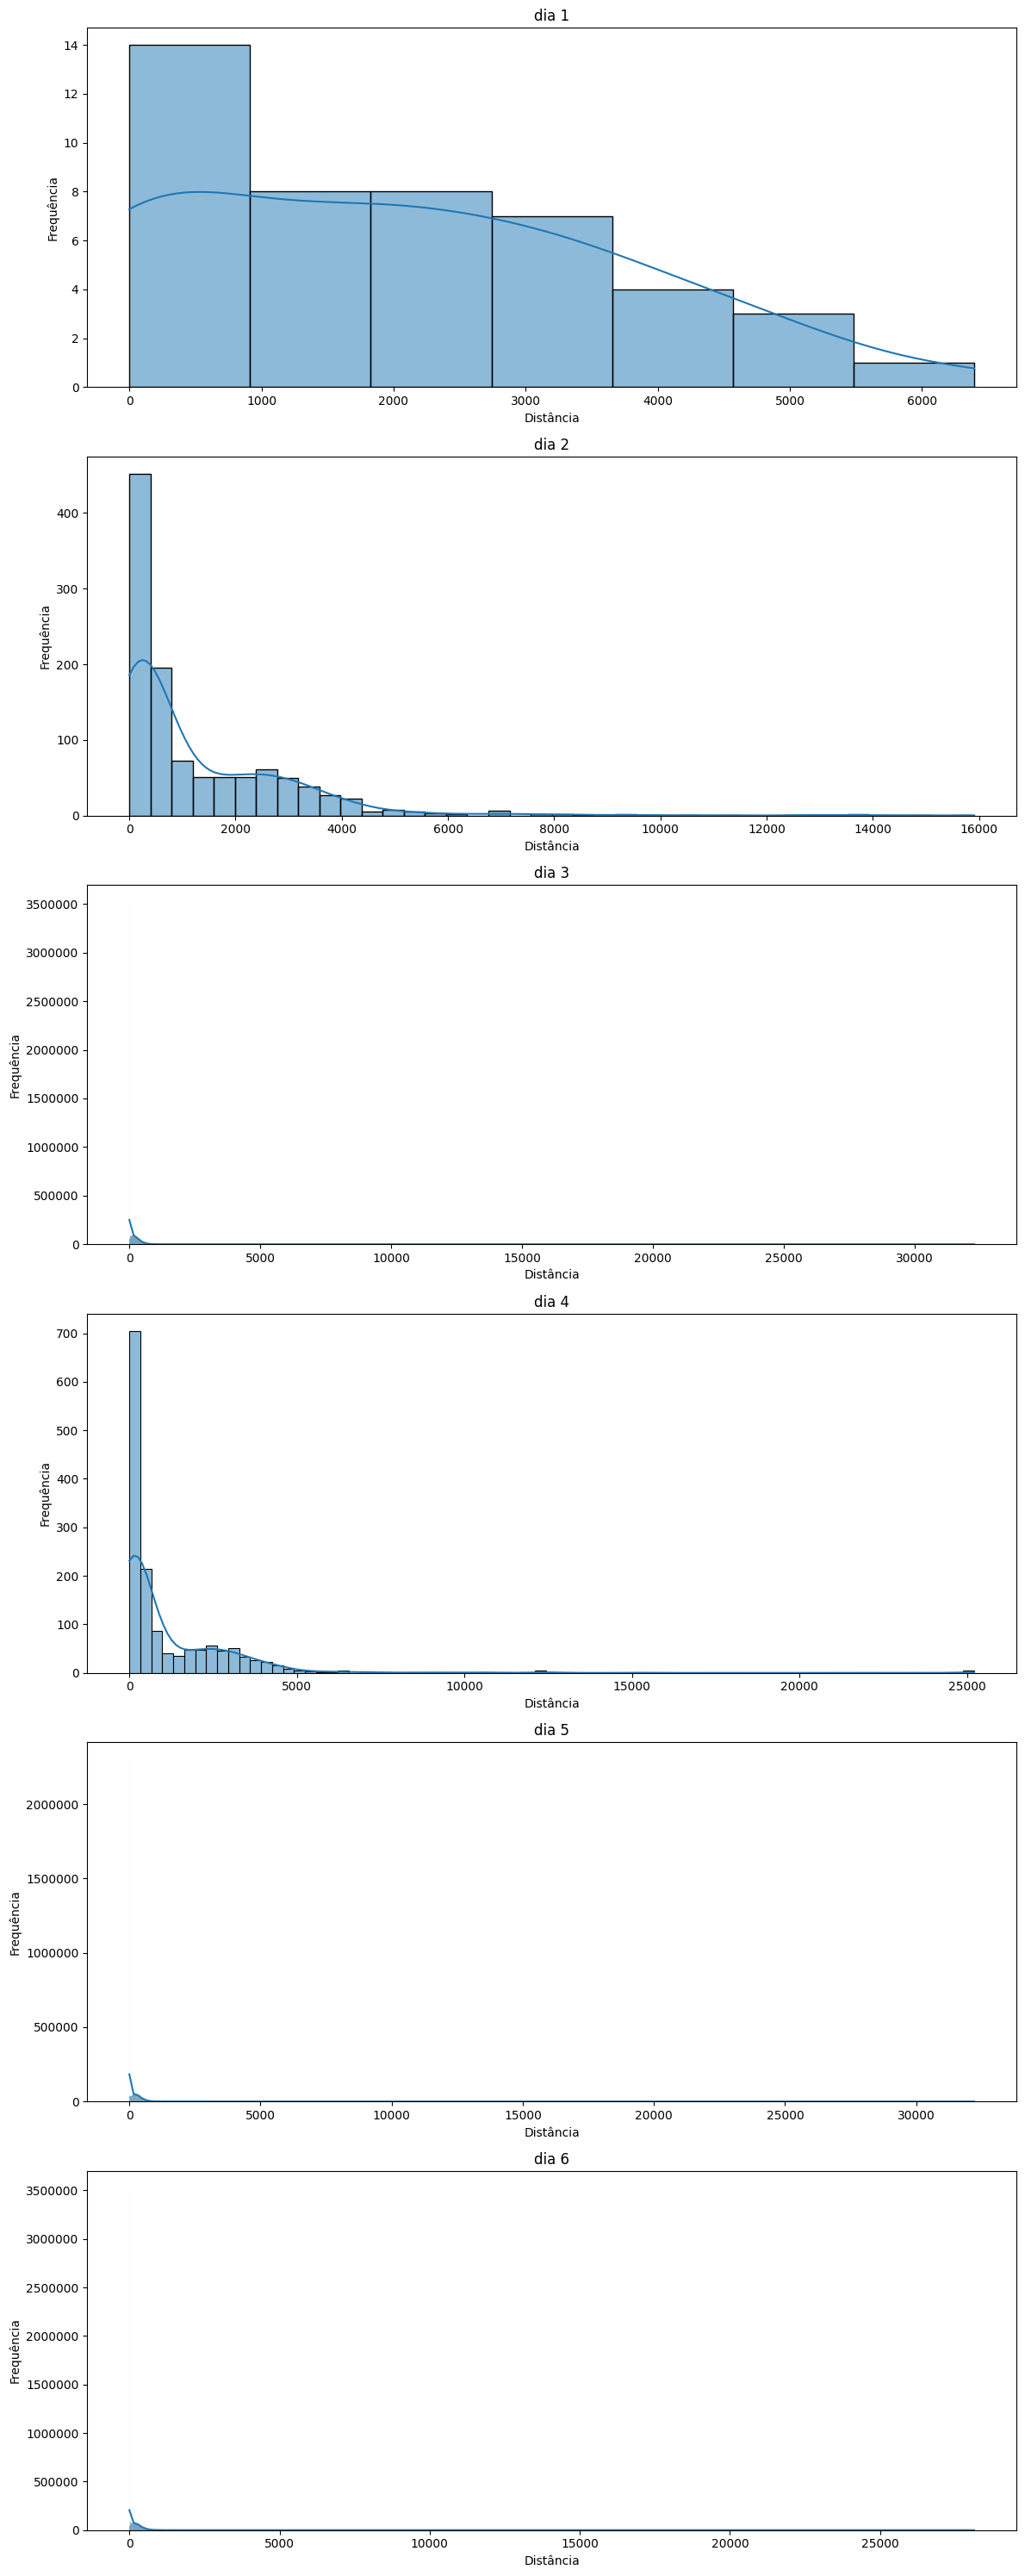

In [9]:
fig, axes = plt.subplots(len(dias_unicos), 1, figsize=(12, 5 * len(dias_unicos)))

if len(dias_unicos) == 1:
    axes = [axes]

for ax, dia in zip(axes, dias_unicos):
    sns.histplot(data=df_posicoes[df_posicoes["dia"] == dia],
                 x="distancia_percorrida", kde=True, ax=ax)
    ax.set_title(f"{dia}")
    ax.set_xlabel("Distância")
    ax.set_ylabel("Frequência")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='x')
    ax.ticklabel_format(style='plain', axis='y')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [10]:
df_posicoes["velocidade"] = (df_posicoes["distancia_percorrida"] / df_posicoes["segundos_deslocamento"]) * 3.6 # m/s --> km/h

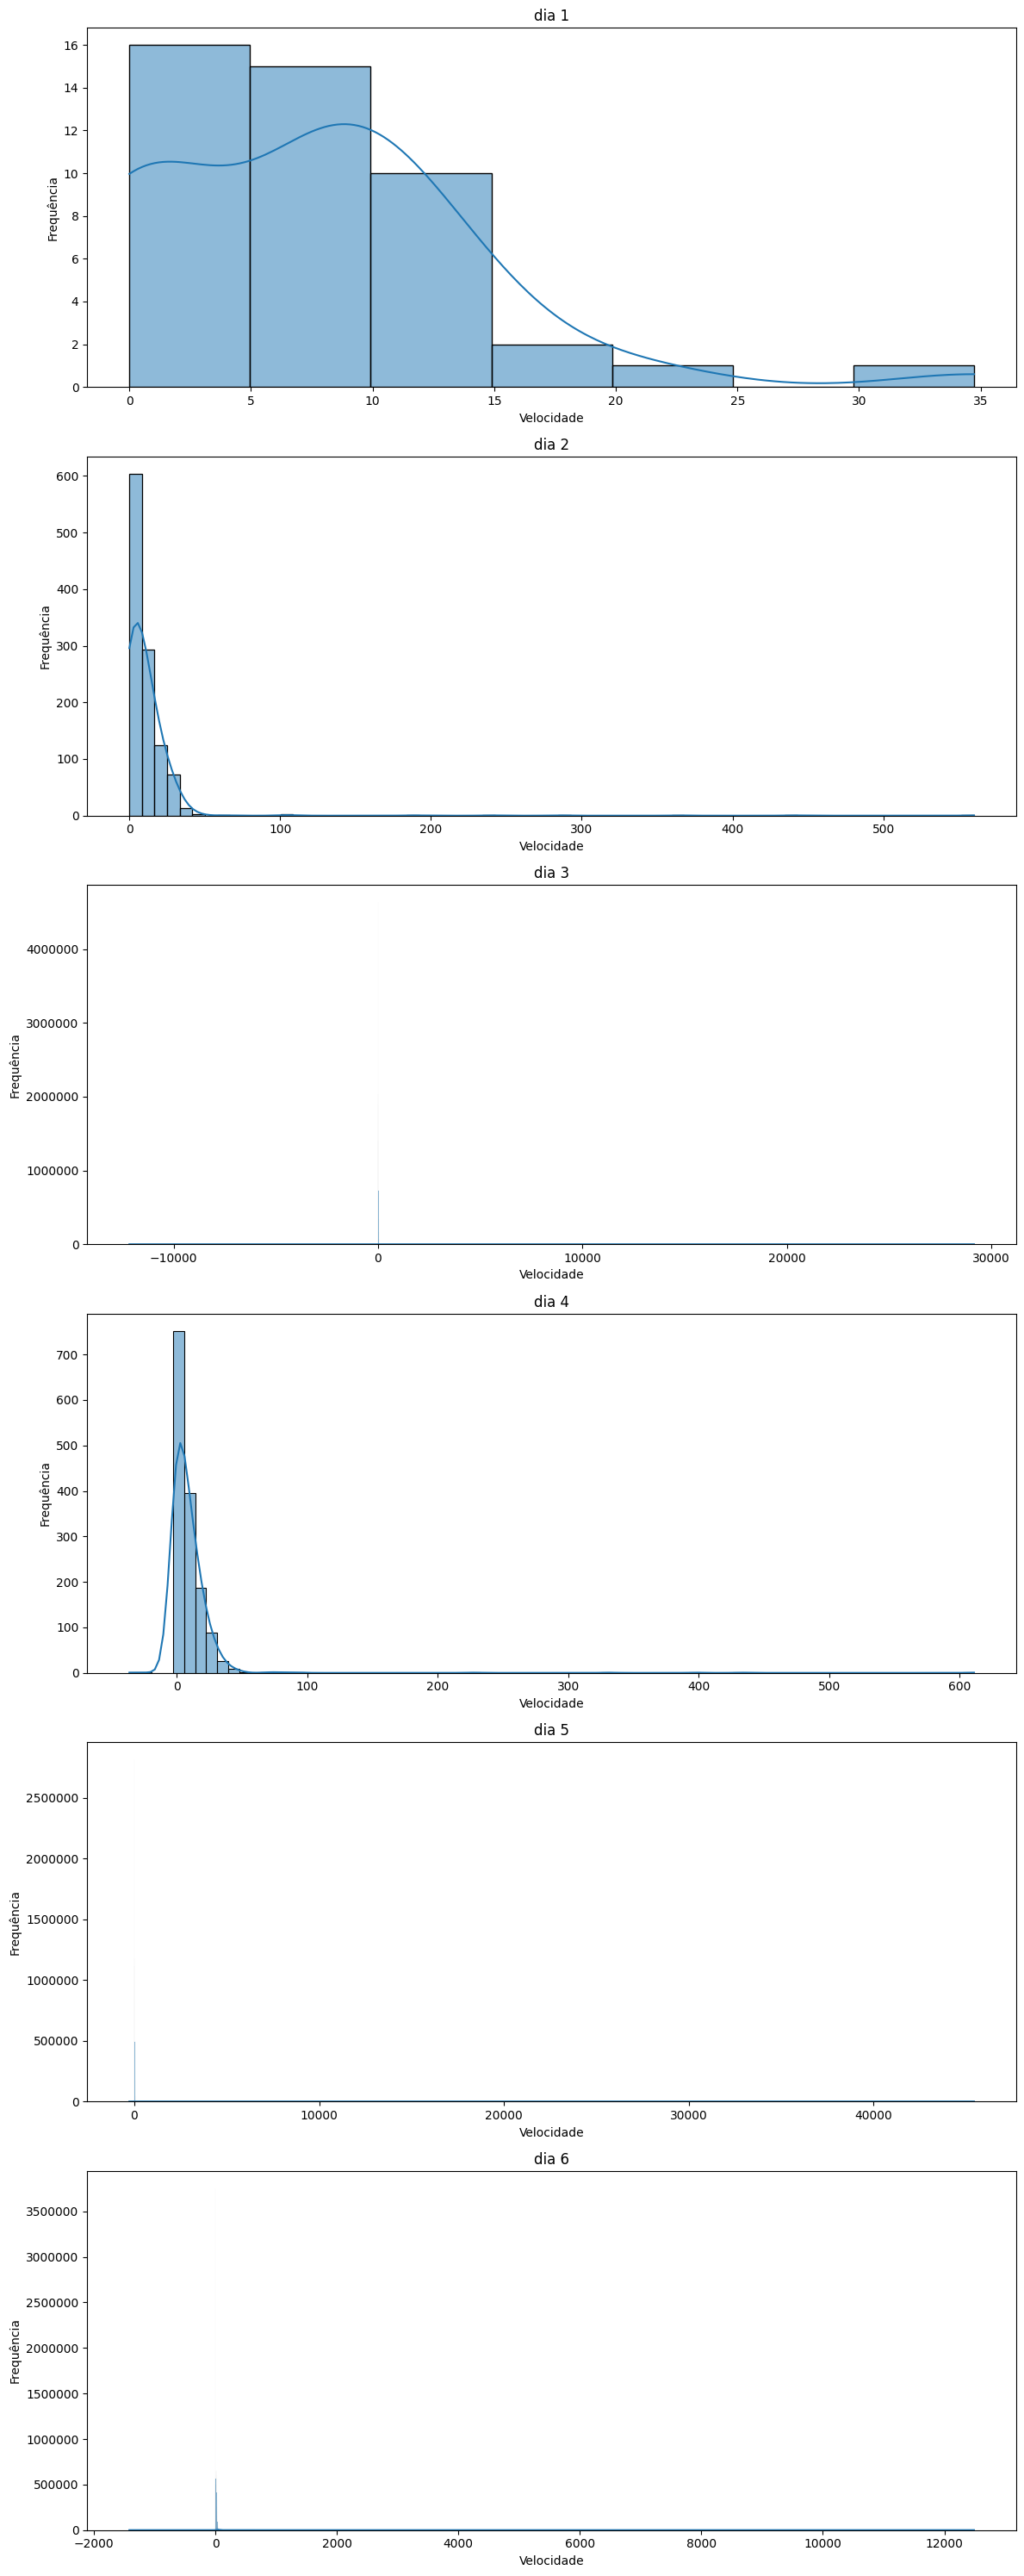

In [11]:
fig, axes = plt.subplots(len(dias_unicos), 1, figsize=(12, 5 * len(dias_unicos)))

if len(dias_unicos) == 1:
    axes = [axes]

for ax, dia in zip(axes, dias_unicos):
    sns.histplot(data=df_posicoes[df_posicoes["dia"] == dia],
                 x="velocidade", kde=True, ax=ax)
    ax.set_title(f"{dia}")
    ax.set_xlabel("Velocidade")
    ax.set_ylabel("Frequência")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='x')
    ax.ticklabel_format(style='plain', axis='y')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [12]:
df_posicoes[df_posicoes['velocidade'] > 50]

,hora_requisicao,codigo_linha,nome_linha,letreiro,codigo_onibus,x,y,hora_gps,geometry,ponto_final,hora_final,distancia_percorrida,segundos_deslocamento,dia,velocidade
102,18:07:00,917,2705-10,METRÔ ITAQUERA - JD. FANGANIELO,36068,-46.470101,-23.542275,2025-10-16 08:23:07-03:00,POINT (349939.05896368553 7395679.474688365),POINT (357803.8240389044 7395374.4325271165),2025-10-16 08:30:20-03:00,7870.678523,433.0,dia 2,65.437512
676,00:04:00,614,971R-10,METRÔ SANTANA - CPTM JARAGUÁ,21323,-46.624845,-23.501060,2025-10-16 23:58:03-03:00,POINT (334089.09072538133 7400072.997636525),POINT (322540.3857376346 7405187.005118238),2025-10-17 00:05:25-03:00,12630.346766,442.0,dia 2,102.871603
4759,00:01:00,33443,175P-10,ANA ROSA - METRÔ SANTANA,21792,-46.636866,-23.585225,2025-10-16 23:59:33-03:00,POINT (332967.768889373 7390738.73107079),POINT (333969.2856765316 7399860.438666988),2025-10-17 00:02:29-03:00,9176.523598,176.0,dia 2,187.701619
5369,00:00:00,35246,208M-10,TERM. PINHEIROS - METRÔ SANTANA,21915,-46.623599,-23.502626,2025-10-16 23:59:54-03:00,POINT (334218.2507348443 7399901.021298345),POINT (326343.43627556344 7392779.24894973),2025-10-17 00:01:39-03:00,10617.548877,105.0,dia 2,364.030247
5681,00:00:00,33027,2058-10,CPTM GUAIANASES - TERM. SÃO MIGUEL,32036,-46.435204,-23.491624,2025-10-16 23:59:58-03:00,POINT (353445.67688813445 7401324.188958036),POINT (355516.99938458996 7395760.3960148115),2025-10-17 00:01:27-03:00,5936.848389,89.0,dia 2,240.142182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28205979,23:57:00,2266,2032-10,METRÔ CARANDIRU - JD. BRASIL,22645,-46.613442,-23.501271,2025-10-20 23:57:35-03:00,POINT (335253.9619239749 7400062.814904686),POINT (339317.75684473134 7401970.190884764),2025-10-20 23:58:29-03:00,4489.154964,54.0,dia 6,299.276998
28206028,23:57:00,931,2718-10,METRÔ PENHA - VL. SÍLVIA,45076,-46.545839,-23.532506,2025-10-20 23:57:35-03:00,POINT (342195.170518011 7396679.884652469),POINT (346911.6928283265 7401104.318756605),2025-10-20 23:58:35-03:00,6466.931254,60.0,dia 6,388.015875
28206033,23:57:00,34945,4002-10,TERM. VL. CARRÃO - GUAIANASES,31008,-46.522449,-23.558425,2025-10-20 23:57:35-03:00,POINT (344613.81810819166 7393835.357944831),POINT (356682.30501437513 7393831.836386291),2025-10-20 23:58:22-03:00,12068.487420,47.0,dia 6,924.394781
28206035,23:57:00,940,2726-10,METRÔ PENHA - LIMOEIRO,35703,-46.546048,-23.533092,2025-10-20 23:57:35-03:00,POINT (342174.58183606144 7396614.764626873),POINT (350089.3665459707 7399480.352620315),2025-10-20 23:58:32-03:00,8417.565655,57.0,dia 6,531.635726


In [13]:
df_posicoes[df_posicoes['velocidade'] < 0]

,hora_requisicao,codigo_linha,nome_linha,letreiro,codigo_onibus,x,y,hora_gps,geometry,ponto_final,hora_final,distancia_percorrida,segundos_deslocamento,dia,velocidade
53794,00:12:00,358,6291-10,TERM. BANDEIRA - INOCOOP CAMPO LIMPO,76352,-46.741377,-23.638407,2025-10-17 00:12:04-03:00,POINT (322372.577405873 7384723.299226376),POINT (318760.96181631344 7384040.585249566),2025-10-16 23:58:57-03:00,3675.576899,-787.0,dia 3,-16.813312
54867,00:12:00,2242,609J-10,METRÔ SÃO JUDAS - AEROPORTO,64265,-46.646281,-23.631139,2025-10-17 00:12:17-03:00,POINT (332065.45116558275 7385643.251961397),POINT (330667.6798992357 7386144.474861292),2025-10-16 23:58:59-03:00,1484.920506,-798.0,dia 3,-6.698889
76185,00:17:00,2118,7016-10,TERM. STO. AMARO - JD. ÂNGELA,73448,-46.734567,-23.679786,2025-10-17 00:17:37-03:00,POINT (323123.0571198745 7380149.373474878),POINT (319234.0885431156 7379122.993339695),2025-10-16 23:56:13-03:00,4022.130377,-1284.0,dia 3,-11.277001
78849,00:22:00,2118,7016-10,TERM. STO. AMARO - JD. ÂNGELA,73448,-46.734292,-23.676067,2025-10-17 00:18:21-03:00,POINT (323146.17331526056 7380561.59973699),POINT (321192.3873834866 7379361.48154218),2025-10-17 00:12:22-03:00,2292.937668,-359.0,dia 3,-22.993247
82450,00:19:00,718,2290-10,TERM. PQ. D. PEDRO II - TERM. SÃO MATEUS,41552,-46.547712,-23.542948,2025-10-17 00:19:21-03:00,POINT (342016.38721531606 7395521.5277794255),POINT (348478.36430186714 7389314.8569416925),2025-10-16 23:59:05-03:00,8959.905734,-1216.0,dia 3,-26.526037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28210735,23:58:00,34688,3735-41,JD. SÃO JOSÉ - METRÔ ARTUR ALVIM,47377,-46.484095,-23.542556,2025-10-20 23:58:38-03:00,POINT (348510.7478565804 7395633.589049764),POINT (348466.5840288178 7395769.68016647),2025-10-19 23:59:24-03:00,143.077726,-86354.0,dia 6,-0.005965
28210736,23:58:00,34384,5164-21,PQ. IBIRAPUERA - CID. LEONOR,64469,-46.638070,-23.612827,2025-10-20 23:58:38-03:00,POINT (332879.88540844386 7387680.711175322),POINT (332120.30999964185 7383932.973875871),2025-10-19 23:59:18-03:00,3823.936410,-86360.0,dia 6,-0.159404
28210739,23:58:00,360,6414-10,TERM. BANDEIRA - SOCORRO,76076,-46.643194,-23.550215,2025-10-20 23:58:39-03:00,POINT (332277.52760121465 7394608.33697304),POINT (325437.2181269672 7383045.448005375),2025-10-19 23:59:21-03:00,13434.665421,-86358.0,dia 6,-0.560050
28210741,23:58:00,1925,857A-10,METRÔ STA. CRUZ - TERM. CAMPO LIMPO,75606,-46.773184,-23.630772,2025-10-20 23:58:39-03:00,POINT (319116.94164314214 7385528.916153507),POINT (327476.90396994294 7392169.857215889),2025-10-19 23:59:09-03:00,10676.659979,-86370.0,dia 6,-0.445015


In [14]:
pd.options.display.float_format = '{:.2f}'.format

df_posicoes['distancia_percorrida'].describe()

count   28177941.00
mean         234.92
std          826.90
min            0.00
25%            0.00
50%          124.47
75%          288.27
max        32279.88
Name: distancia_percorrida, dtype: float64

In [15]:
df_posicoes['velocidade'].describe()

count   28177941.00
mean          13.42
std           53.65
min       -12162.41
25%            0.00
50%            8.11
75%           17.33
max        45433.70
Name: velocidade, dtype: float64

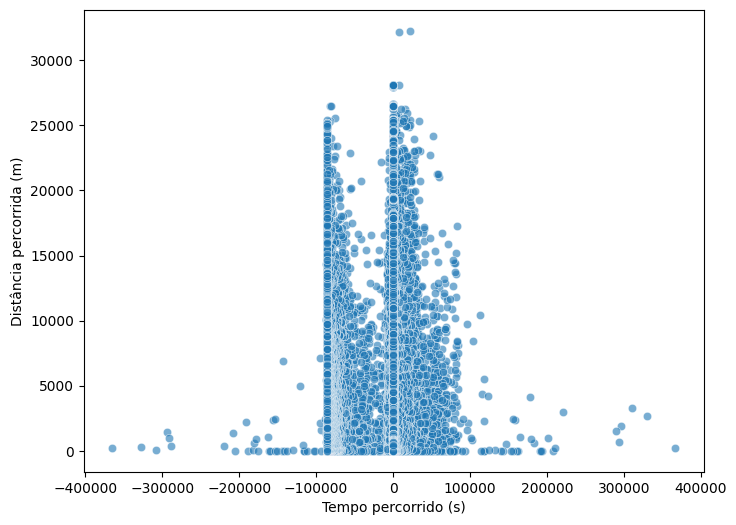

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_posicoes,
    x="segundos_deslocamento",
    y="distancia_percorrida",
    alpha=0.6
)
plt.xlabel("Tempo percorrido (s)")
plt.ylabel("Distância percorrida (m)")
plt.show()